In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
# Generate synthetic data for binary classification
X, y = make_classification(n_samples=100,
                           n_features=2,
                           n_informative=1,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           n_classes=2,
                           random_state=41, class_sep=1)

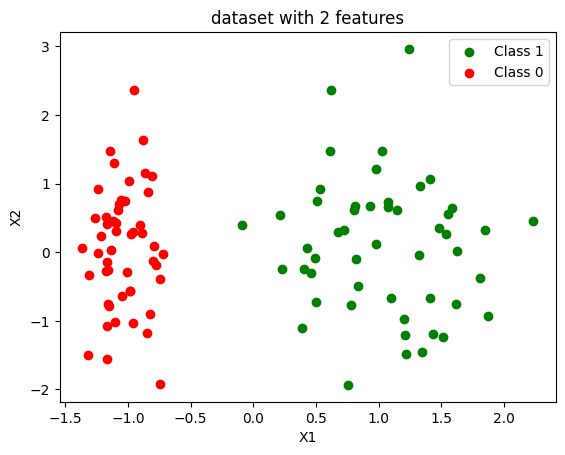

In [ ]:
#plotting the dataset
plt.scatter(X[y==1,0],X[y==1,1],color='green')
plt.scatter(X[y==0,0],X[y==0,1],color='red')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("dataset with 2 features")
plt.legend(["Class 1","Class 0"])
plt.show()

In [ ]:
class SVCClassifier:
  def __init__(self,learning_rate,epochs,C):
    self.learning_rate=learning_rate
    self.epochs=epochs
    self.C=C
  def fit(self,X,Y):
    #label the classes as the -1 and +1
    Y=np.where(Y==0,-1,1)
    #initializing the weights
    self.coefficients=np.zeros(X.shape[1])
    self.b=0
    for i in range(self.epochs):
      #select a random data point
      random_index=np.random.randint(0,X.shape[0])
      #computing the 1-y(WX+b)
      score=1-(Y[random_index]*(np.dot(self.coefficients,X[random_index])+self.b))
      if(score>0):
        self.coefficients=self.coefficients-(self.learning_rate*(self.coefficients-(self.C*Y[random_index]*X[random_index])))
        self.b=self.b+(self.learning_rate*self.C*Y[random_index])
      else:
        self.coefficients=self.coefficients-self.learning_rate*self.coefficients
    return self.coefficients,self.b
  def predict(self,X_test):
    y_pred=[]
    for i in range(X_test.shape[0]):
      y_pred.append(np.sign(np.dot(self.coefficients,X_test[i])+self.b))
    res=[]
    for i in y_pred:
      if(i==-1):
        res.append(0)
      else:
        res.append(1)
    return np.array(res)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the SVM model
model = SVCClassifier(learning_rate=0.01, epochs=1000, C=1)
coefficients,intercept=model.fit(X_train, y_train)
# Predict on the test set
y_pred = model.predict(X_test)
# Evaluate the model using accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("y_pred",y_pred)
print("y_test",y_test)
print("coefficients",coefficients)
print("intercept",intercept)
print("classification_report",classification_report(y_test, y_pred))

Accuracy: 1.0
y_pred [1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1]
y_test [1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1]
coefficients [0.70645706 0.06409194]
intercept -0.12999999999999995
classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        15

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', C=1.0)
# Train the model
svm_model.fit(X_train, y_train)
# Predict on the test data
y_pred = svm_model.predict(X_test)
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
# Retrieve model parameters
w = svm_model.coef_[0]
b = svm_model.intercept_[0]
print("weights: ",w)
print("intercept: ",b)
print("classification_report",classification_report(y_test, y_pred))

Accuracy: 1.0
weights:  [ 1.76020839 -0.00460801]
intercept:  0.30456499322348896
classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        15

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



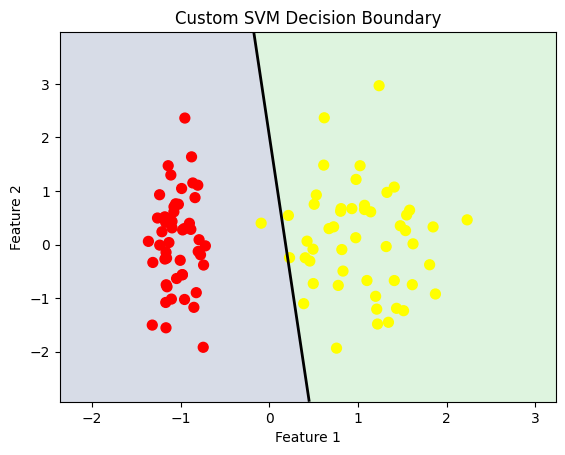

In [ ]:
#since the we are selecting the random points for the calculation of the radients and updating the coefficients and intercept the decision boundary
#may vary this is the problem with the above custom implementation if you use the Batch gradient descent it will converge to same point but
#it takes more computations that is not efficient
def plot_decision_boundary(X, y,model):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
    # Compute the decision boundary
    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], model.coefficients) + model.b
    Z = Z.reshape(xx.shape)
    # Plot the decision boundary
    plt.contourf(xx, yy, Z > 0, alpha=0.2)
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k')
    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', s=50)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Custom SVM Decision Boundary")
    plt.show()
plot_decision_boundary(X,y,model)


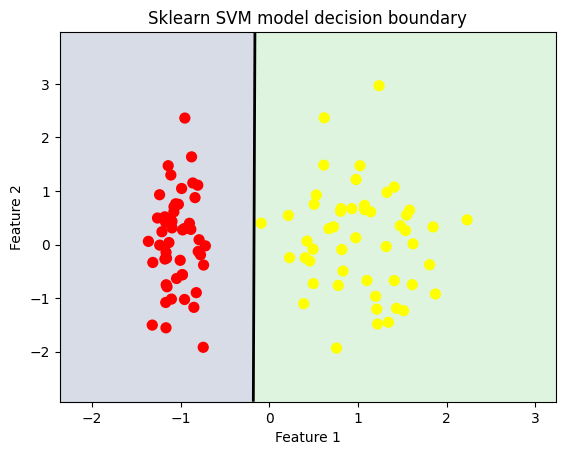

In [ ]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot decision boundary and margin
plt.contourf(xx, yy, Z > 0, alpha=0.2)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k')  # Decision boundary
# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', s=50)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Sklearn SVM model decision boundary")
plt.show()

In [ ]:
#implementing the custom support vector machine model on the dataset
diabetes=pd.read_csv("/content/diabetes.csv")
diabetes.head()
diabetes.columns=["X"+str(i) for i in range(diabetes.shape[1])]
diabetes.columns
print("shape of the dataset: ",diabetes.shape)
print("is there any null values present",diabetes.isnull().sum())
print("data types of the columns",diabetes.dtypes)

shape of the dataset:  (768, 9)
is there any null values present X0    0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
dtype: int64
data types of the columns X0      int64
X1      int64
X2      int64
X3      int64
X4      int64
X5    float64
X6    float64
X7      int64
X8      int64
dtype: object


In [ ]:
#statistics of the datase
diabetes.describe()

,X0,X1,X2,X3,X4,X5,X6,X7,X8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
#applying the svm model to the dataset
X=diabetes.iloc[:,:-1].values
Y=diabetes.iloc[:,-1].values
#splitting the data into train data and test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
#model
svm=SVCClassifier(0.001,2000,1)
svm.fit(X_train,Y_train)
svm.predict(X_test)
#calculating the accuracy
print("accuracy of the model is: ",accuracy_score(Y_test,svm.predict(X_test)))
print("classification_report",classification_report(Y_test,svm.predict(X_test)))

accuracy of the model is:  0.5909090909090909
classification_report               precision    recall  f1-score   support

           0       0.67      0.72      0.69        99
           1       0.42      0.36      0.39        55

    accuracy                           0.59       154
   macro avg       0.54      0.54      0.54       154
weighted avg       0.58      0.59      0.58       154



In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', C=1.0)
# Train the model
svm_model.fit(X_train, Y_train)
# Predict on the test data
y_pred = svm_model.predict(X_test)
print("accuracy of the model is: ",accuracy_score(Y_test,y_pred))
print("classification_report",classification_report(Y_test,y_pred))

accuracy of the model is:  0.7532467532467533
classification_report               precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



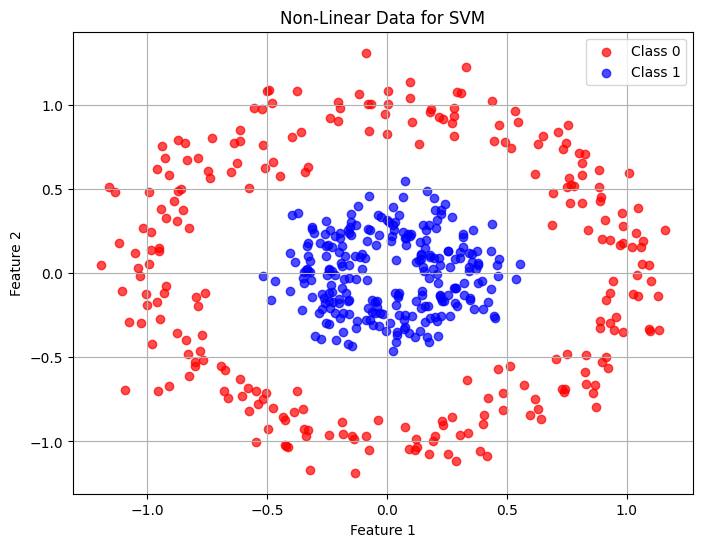

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Generate non-linear data
# `n_samples` is the total number of data points
# `factor` controls the distance between the inner and outer circles
# `noise` adds some randomness to the data
X, y = make_circles(n_samples=500, factor=0.3, noise=0.1, random_state=42)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0', alpha=0.7)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1', alpha=0.7)
plt.title('Non-Linear Data for SVM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


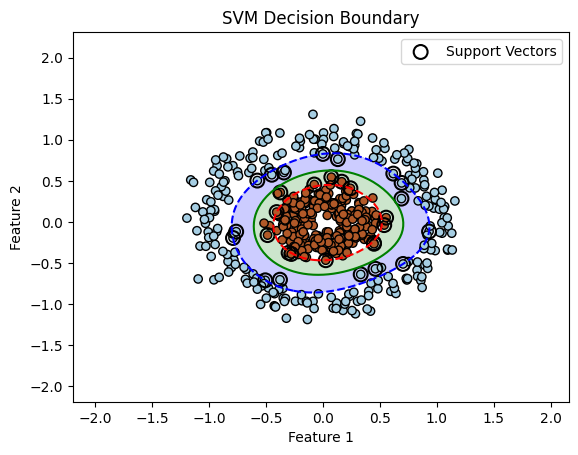

In [ ]:
#training the data
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
svm_model = SVC(kernel='rbf', C=1.0)
# Train the model
svm_model.fit(X_train, y_train)
predicted=svm_model.predict(X_test)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Predict on the grid
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and margins
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.2, colors=['blue', 'green', 'red'])
plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors=['blue', 'green', 'red'], linestyles=['--', '-', '--'])

# Scatter plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)

# Highlight support vectors
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', linewidth=1.5, label='Support Vectors')

plt.legend()
plt.title('SVM Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
#implementing the custom support vector machine model on the dataset
diabetes=pd.read_csv("/content/diabetes.csv")
diabetes.head()
diabetes.columns=["X"+str(i) for i in range(diabetes.shape[1])]
diabetes.columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
#applying the svm model to the dataset
X=diabetes.iloc[:,:-1].values
Y=diabetes.iloc[:,-1].values
#splitting the data into train data and test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
svm=SVC(kernel='rbf')
svm.fit(X_train,Y_train)
#calculating the accuracy
print("accuracy of the model is: ",accuracy_score(Y_test,svm.predict(X_test)))
print("classification_report",classification_report(Y_test,svm.predict(X_test)))

accuracy of the model is:  0.7662337662337663
classification_report               precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.72      0.56      0.63        55

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154

